In [10]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

os.chdir( "/Users/etmu9498/research/code/scripts")
import helper_fns


In [12]:
os.chdir( "/Users/etmu9498/research/data/tdr/sam/3d-bl-final-project")

tdr = xr.open_dataset( "210929H2_2249_xy.nc")

print( np.shape( tdr.x))
print( np.shape( tdr.LATITUDE))

# print( tdr.LATITUDE[ 0].values)
# print( tdr.LATITUDE[ -1].values)

# print( tdr.LONGITUDE[ 0].values)
# print( tdr.LONGITUDE[ -1].values)

print( tdr.LONGITUDE.isel(time=0).isel(y=0).values)
print( tdr.LATITUDE.isel(time=0).isel(x=0).values )

tdr

(250,)
(250, 250, 1)
[-60.249184 -60.23026  -60.211334 -60.19241  -60.173485 -60.154556
 -60.13563  -60.116707 -60.097782 -60.078857 -60.059933 -60.041008
 -60.022083 -60.00316  -59.98423  -59.965305 -59.94638  -59.927456
 -59.90853  -59.889606 -59.87068  -59.851757 -59.83283  -59.813904
 -59.79498  -59.776054 -59.75713  -59.738205 -59.71928  -59.700356
 -59.68143  -59.662502 -59.643578 -59.624653 -59.60573  -59.586803
 -59.56788  -59.548954 -59.53003  -59.5111   -59.492176 -59.47325
 -59.454327 -59.435402 -59.416477 -59.397552 -59.378628 -59.359703
 -59.340775 -59.32185  -59.302925 -59.284    -59.265076 -59.24615
 -59.227226 -59.2083   -59.189377 -59.17045  -59.151524 -59.1326
 -59.113674 -59.09475  -59.075825 -59.0569   -59.037975 -59.019047
 -59.000122 -58.981197 -58.962273 -58.943348 -58.924423 -58.9055
 -58.886574 -58.867645 -58.84872  -58.829796 -58.81087  -58.791946
 -58.77302  -58.754097 -58.735172 -58.716248 -58.69732  -58.678394
 -58.65947  -58.640545 -58.62162  -58.602695 -5

<xarray.Dataset>
Dimensions:             (time: 1, level: 37, y: 250, x: 250)
Coordinates:
  * time                (time) float32 8.218e+04
  * level               (level) float32 0.0 0.5 1.0 1.5 ... 16.5 17.0 17.5 18.0
  * y                   (y) float32 -249.0 -247.0 -245.0 ... 245.0 247.0 249.0
  * x                   (x) float32 -249.0 -247.0 -245.0 ... 245.0 247.0 249.0
Data variables:
    includeincomposite  (time) int32 ...
    VORT                (x, y, level, time) float32 ...
    U                   (x, y, level, time) float32 ...
    V                   (x, y, level, time) float32 ...
    W                   (x, y, level, time) float32 ...
    REFLECTIVITY        (x, y, level, time) float32 ...
    WIND_SPEED          (x, y, level, time) float32 ...
    LATITUDE            (x, y, time) float32 ...
    LONGITUDE           (x, y, time) float32 ...
    RADIAL_WIND         (x, y, level, time) float32 ...
    TANGENTIAL_WIND     (x, y, level, time) float32 ...
Attributes: (12/137)
    NOTE1:                                                                   ...
    KEYWORD:                                                                 ...
    FLTNAME:                                                                 ...
    STMNAME:                                                                 ...
    RADAR:                                                                   ...
    EXPERIMENT:                                                              ...
    ...                                                                                                           ...
    FIRST GUESS BACKGROUND WEIGHT FOR NORTH-SOUTH WIND COMPONENT:            ...
    FIRST GUESS BACKGROUND WEIGHT FOR VERTICAL WIND COMPONENT:               ...
    DATE OF SYNTHESIS (YYYYMMDD):                                            ...
    TIME OF SYNTHESIS (HHMMSS.XXX):                                          ...
    ZONE DIFFERENCE FROM UTC (HHMM):                                         ...
    ANALYSIS LEVEL (1--REAL-TIME,2--RESEARCH QUALITY):                       ...

Text(0.5, 1.0, 'TDR Slice of TC Sam at 3 Km Altitude')

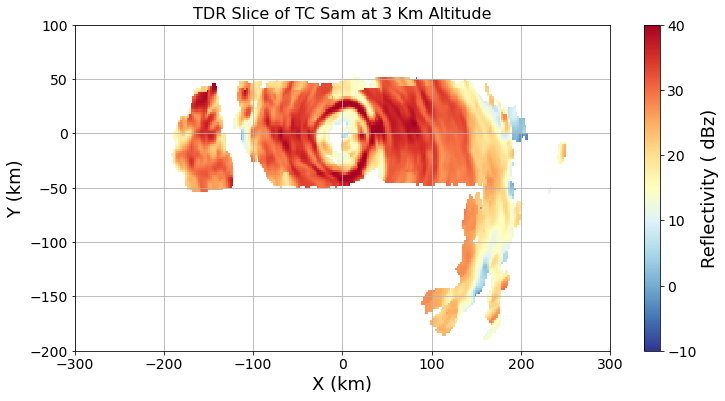

In [18]:
# plot radar reflectivity vs x and y distances!

plt.figure( figsize=(12, 6))
helper_fns.change_font_sizes()
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.pcolormesh( - tdr.x, - tdr.y, tdr.REFLECTIVITY.isel(time=0).isel(level=6).transpose(), cmap=color_map,
                   vmin=-10, vmax=40) 

plt.ylabel( 'Y (km)')
plt.xlabel( "X (km)")

plt.xlim( [-300, 300])
plt.ylim( [-200, 100])
plt.grid( 'on')
plt.colorbar(label="Reflectivity ( dBz)")
plt.title( "TDR Slice of TC Sam at 3 Km Altitude", fontsize=16)


Text(0.5, 1.0, 'TC Sam, 9/29/21 Eye Pass 2, TDR Slice at 2 Km')

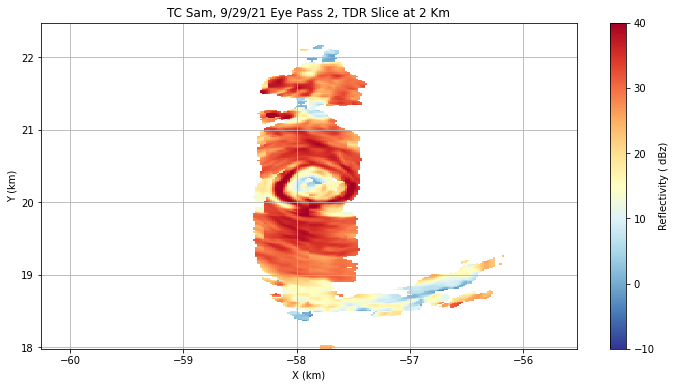

In [40]:
# the same plot as above but hopefully with lat and lon values!!

plt.figure( figsize=(12, 6))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()


plt.pcolormesh(tdr.LONGITUDE.isel(time=0).isel(y=0).values, tdr.LATITUDE.isel(time=0).isel(x=0).values,
               tdr.REFLECTIVITY.isel(time=0).isel(level=4), cmap=color_map,
               vmin=-10, vmax=40) 

plt.ylabel( 'Y (km)')
plt.xlabel( "X (km)")
plt.grid( 'on')
plt.colorbar(label="Reflectivity ( dBz)")
plt.title( "TC Sam, 9/29/21 Eye Pass 2, TDR Slice at 2 Km")
